In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_veg=pd.read_csv("newnewveg.csv")
df_anim=pd.read_csv("new_prot.csv")
df_pop=pd.read_csv("pop_totale.csv")

# 1 Nettoyer les titres de colonnes :
Supprimer les espaces au début et à la fin des titres (s’il y en a)
Remplacer les espaces par des underscores (ceux se situant entre les mots)
Tout mettre en minuscule

In [2]:
df_anim.columns=df_anim.columns.str.strip()
df_veg.columns=df_anim.columns.str.strip()
df_pop.columns=df_anim.columns.str.strip()

df_anim.columns=df_anim.columns.str.replace(" ","_")
df_veg.columns=df_anim.columns.str.replace(" ","_")
df_pop.columns=df_anim.columns.str.replace(" ","_")

df_anim.columns=df_anim.columns.str.lower()
df_veg.columns=df_anim.columns.str.lower()
df_pop.columns=df_anim.columns.str.lower()

# 2 Quelle sont les dimensions des jeux de données ?

In [3]:
df_pop.shape
df_veg.shape
df_anim.shape
df_anim.columns
df_pop.columns
df_veg.columns


Index(['code_domaine', 'domaine', 'code_zone_(m49)', 'zone', 'code_élément',
       'élément', 'code_produit_(cpc)', 'produit', 'code_année', 'année',
       'unité', 'valeur', 'symbole', 'description_du_symbole'],
      dtype='object')

# 3 A quoi ressemblent les 5 premières lignes de mes jeux de données ?

In [4]:
df_pop.head(5)
df_veg.head(5)
df_anim.head(5)

,code_domaine,domaine,code_zone_(m49),zone,code_élément,élément,code_produit_(cpc),produit,code_année,année,unité,valeur,symbole,description_du_symbole
0,FBS,Bilans Alimentaires (2010-),4,Afghanistan,511,Population totale,S2501,Population,2018,2018,1000 personnes,37172.00,X,Ciffre de sources internationales
1,FBS,Bilans Alimentaires (2010-),4,Afghanistan,511,Population totale,S2501,Population,2019,2019,1000 personnes,38041.75,X,Ciffre de sources internationales
2,FBS,Bilans Alimentaires (2010-),4,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,S2731,Viande de Bovins,2018,2018,kg,2.62,E,Valeur estimée
3,FBS,Bilans Alimentaires (2010-),4,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,S2731,Viande de Bovins,2019,2019,kg,2.73,E,Valeur estimée
4,FBS,Bilans Alimentaires (2010-),4,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),S2731,Viande de Bovins,2018,2018,Kcal/personne/jour,15.42,E,Valeur estimée


# 4 Pour les datasets df_anim et df_veg, ajoutez une colonne ‘type’ qui prendra respectivement une valeur ‘animal’ et ‘vegetal’. Une fois cette étape effectuée, regroupez les deux jeux de données en 1 et appelez ce DataFrame product.

In [5]:
df_anim["type"]="animal"
df_veg["type"]="vegetal"

products= pd.concat([df_anim, df_veg])

# 5 Transformez df_pop afin de ne garder que le code du pays, le pays, l’année et la population. Renommer la colonne ‘value’ en ‘pop_1000_hab’.


In [6]:
df_pop=df_pop[["code_zone_(m49)","zone","année","valeur"]]
df_pop=df_pop.rename( columns={"code_zone_(m49)":"code_pays"})
df_pop=df_pop.rename( columns={"zone":"pays"})
df_pop=df_pop.rename( columns={"valeur":"pop_1000_hab"})

# 6 Transformez products afin de ne garder que les colonnes area_code_(fao), area, element, item, year, type, unit, value.


In [7]:
products = products.loc[:, ['code_zone_(m49)', 'zone', 'élément', 'produit', 'année', 'valeur','type','unité']]
products = products.rename(columns={"code_zone_(m49)": "code_pays", "zone": "pays"})
products

,code_pays,pays,élément,produit,année,valeur,type,unité
0,4,Afghanistan,Population totale,Population,2018,37172.00,animal,1000 personnes
1,4,Afghanistan,Population totale,Population,2019,38041.75,animal,1000 personnes
2,4,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,Viande de Bovins,2018,2.62,animal,kg
3,4,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,Viande de Bovins,2019,2.73,animal,kg
4,4,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Viande de Bovins,2018,15.42,animal,Kcal/personne/jour
...,...,...,...,...,...,...,...,...
93819,716,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Miscellanees,2019,2.94,vegetal,Kcal/personne/jour
93820,716,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Miscellanees,2018,0.04,vegetal,g/personne/jour
93821,716,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Miscellanees,2019,0.09,vegetal,g/personne/jour
93822,716,Zimbabwe,Disponibilité de matière grasse en quantité (g...,Miscellanees,2018,0.01,vegetal,g/personne/jour


# 7 Fusionnez df_pop avec products et nommez ce DataFrame df. Afin de fusionner ces jeux de données vous devez identifier les clés primaires. Renommer les colonnes comme sur la capture d’écran ci-dessous.


In [8]:
df=pd.merge(products,df_pop,on=['code_pays','pays','année'])
df=df.reindex(columns=['code_pays','pays','année','pop_1000_hab','élément','produit','type','valeur'])
df

,code_pays,pays,année,pop_1000_hab,élément,produit,type,valeur
0,4,Afghanistan,2018,37172.00,Population totale,Population,animal,37172.00
1,4,Afghanistan,2018,37172.00,Disponibilité alimentaire en quantité (kg/pers...,Viande de Bovins,animal,2.62
2,4,Afghanistan,2018,37172.00,Disponibilité alimentaire (Kcal/personne/jour),Viande de Bovins,animal,15.42
3,4,Afghanistan,2018,37172.00,Disponibilité de protéines en quantité (g/pers...,Viande de Bovins,animal,1.09
4,4,Afghanistan,2018,37172.00,Disponibilité de matière grasse en quantité (g...,Viande de Bovins,animal,1.20
...,...,...,...,...,...,...,...,...
125727,716,Zimbabwe,2019,14645.47,Disponibilité de matière grasse en quantité (g...,Aliments pour enfants,vegetal,0.00
125728,716,Zimbabwe,2019,14645.47,Disponibilité alimentaire en quantité (kg/pers...,Miscellanees,vegetal,2.62
125729,716,Zimbabwe,2019,14645.47,Disponibilité alimentaire (Kcal/personne/jour),Miscellanees,vegetal,2.94
125730,716,Zimbabwe,2019,14645.47,Disponibilité de protéines en quantité (g/pers...,Miscellanees,vegetal,0.09


# 8 Quelles sont les types de données de chaque colonne ?

In [9]:
df.dtypes


code_pays         int64
pays             object
année             int64
pop_1000_hab    float64
élément          object
produit          object
type             object
valeur          float64
dtype: object

# 9 Combien y-a t’il de valeurs manquantes par variable ?

In [10]:

df.isna().sum()

code_pays       0
pays            0
année           0
pop_1000_hab    0
élément         0
produit         0
type            0
valeur          0
dtype: int64

# 10 Est-ce qu’il y a des valeurs aberrantes ? (population négative, etc.) Utilisez un récapitulatif statistique pour répondre à cette question.


In [11]:
df.describe()

,code_pays,année,pop_1000_hab,valeur
count,125732.000000,125732.000000,1.257320e+05,1.257320e+05
mean,425.303908,2018.508582,5.142080e+04,2.999128e+02
std,250.727476,0.499928,1.872287e+05,1.445502e+04
min,4.000000,2018.000000,1.076000e+01,-3.000000e-02
25%,204.000000,2018.000000,2.801000e+03,0.000000e+00
50%,418.000000,2019.000000,9.965000e+03,2.000000e-01
75%,642.000000,2019.000000,3.182529e+04,2.940000e+00
max,894.000000,2019.000000,1.465634e+06,1.465634e+06


# rep: oui il y  a des valeures aberrantes: notament le minimulm de la colonne "valeur", qui est un nombre négatif

# 11 Affichez les valeurs uniques de la colonne area

In [12]:
df['pays'].value_counts()

Soudan                           752
Chine                            748
Sénégal                          748
Népal                            748
Ouganda                          744
                                ... 
Qatar                            354
Soudan du Sud                    350
Bhoutan                          312
Nauru                            266
Micronésie (États fédérés de)    266
Name: pays, Length: 186, dtype: int64

# 12 Gardez uniquement les informations relatives aux pays (supprimez les zones géographiques ou économiques) Note : en fonction de votre méthode d’importation de données cette étape est facultative.


In [13]:
df.drop(df.loc[df['pays']=='Chine, continentale'].index, inplace=True)

# 13 Modifiez votre jeu de données afin que les informations soient indexées par area_code, area, year, pop_1000_hab, type et item. Les valeurs de la colonne element doivent être séparées dans des colonnes différentes

In [14]:
df=pd.pivot_table(df,  
                                index=['code_pays','pays', 'année','pop_1000_hab','type','produit'],columns=['élément'],values='valeur'
                                )


df=df.reset_index()
df

élément,code_pays,pays,année,pop_1000_hab,type,produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Population totale
0,4,Afghanistan,2018,37172.00,animal,Abats Comestible,4.19,1.36,0.16,0.60,NaN
1,4,Afghanistan,2018,37172.00,animal,"Beurre, Ghee",22.14,1.00,2.50,0.03,NaN
2,4,Afghanistan,2018,37172.00,animal,Crème,0.23,0.04,0.02,0.00,NaN
3,4,Afghanistan,2018,37172.00,animal,Graisses Animales Crue,7.96,0.27,0.88,0.01,NaN
4,4,Afghanistan,2018,37172.00,animal,Lait - Excl Beurre,99.39,37.36,5.03,6.11,NaN
...,...,...,...,...,...,...,...,...,...,...,...
31973,894,Zambie,2019,17861.03,vegetal,Sésame,0.00,0.00,0.00,0.00,NaN
31974,894,Zambie,2019,17861.03,vegetal,Thé,0.12,0.11,0.00,0.03,NaN
31975,894,Zambie,2019,17861.03,vegetal,Tomates et produits,0.78,1.40,0.01,0.04,NaN
31976,894,Zambie,2019,17861.03,vegetal,Vin,0.28,0.15,0.00,0.00,NaN


In [15]:
df.drop( "Population totale", axis=1, inplace=True)

# 15 Créez des masques afin d’afficher un DataFrame qui ne contient que l’année 2018

In [16]:
masque = df['année'] == 2018
df_2018 = df[masque]

# 16 Nous allons ajouter une nouvelle colonne à notre jeu de données : la zone géographique. 

In [17]:
af_est=pd.read_csv("east_africa.csv")
af_mid=pd.read_csv("middle_africa.csv")
af_nor=pd.read_csv("northern_africa.csv")
af_sou=pd.read_csv("southern_africa.csv")
af_wes=pd.read_csv("western_africa.csv")
am_nor=pd.read_csv("northern_america.csv")
am_cen=pd.read_csv("central_america.csv")
car=pd.read_csv("caribbean.csv")
am_sou=pd.read_csv("south_america.csv")
as_est=pd.read_csv("eastern_asia.csv")
as_sou=pd.read_csv("southern_asia.csv")
as_sest=pd.read_csv("south_eastern_asia.csv")
as_wes=pd.read_csv("western_asia.csv")
eu_est=pd.read_csv("eastern_europe.csv")
eu_nor=pd.read_csv("northern_europe.csv")
eu_sou=pd.read_csv("southern_europe.csv")
eu_wes=pd.read_csv("western_europe.csv")
austral=pd.read_csv("australia_new_zeland.csv")
melan=pd.read_csv("melanesia.csv")
micro=pd.read_csv("micronesia.csv")
poly=pd.read_csv("polynesia.csv")

In [18]:
df["zone"]=1    #création d'une nouvelle colonne pour la zone géographique >>> valeures vont ê actualisées dans la fonction d'aprés

In [19]:
list_name=['east_africa','middle_africa','northern_africa','southern_africa','western_africa','northern_america','central_america','caribbean','south_america','eastern_asia','southern_asia','south_eastern_asia','western_asia','eastern_europe','northern_europe','southern_europe','western_europe','australia_new_zeland','melanesia','micronesia','polynesia']
def foncia(list_name):
    for i in list_name : 
        df_la= pd.read_csv(i+".csv")                   # j'itére sur ts les éléments de la liste 
        code=df_la["Area Code (M49)"]                    #j'ai une série
        for j in code:                                   #j'itére sur ts les éléments de cette série                                                                          # je reprends la colonne area_code etc de l'itérant actu de la liste
            for idx, x in df['code_pays'].iteritems(): #point de comparaison en itérant sur tte ma colonne
                if j==x:
                    df["zone"][idx]=i
                    
foncia(list_name)

/tmp/ipykernel_5140/610542812.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, x in df['code_pays'].iteritems(): #point de comparaison en itérant sur tte ma colonne
/tmp/ipykernel_5140/610542812.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["zone"][idx]=i
/tmp/ipykernel_5140/610542812.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, x in df['code_pays'].iteritems(): #point de comparaison en itérant sur tte ma colonne
/tmp/ipykernel_5140/610542812.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, x in df['code_pays'].iteritems(): #point de comparaison en itérant sur tte ma colonne
/tmp/ipykernel

# Étape n°3: Exploration
#Quelle est la médiane de la variable fat_supply_quantity_(g/capita/day) ? Q1 ? Q3 ? La moyenne ? L’écart type ? (il existe une méthode pour visualiser toutes ces informations en même temps).

In [20]:
df['Disponibilité de matière grasse en quantité (g/personne/jour)'].describe()

count    31028.000000
mean         1.071793
std          3.483617
min          0.000000
25%          0.000000
50%          0.030000
75%          0.360000
max         83.770000
Name: Disponibilité de matière grasse en quantité (g/personne/jour), dtype: float64

# interpretation: en comparant la disponibilité, en grammes par jour, de matière grasse de tous les pays. On s'aperçoit que  la moitié des pays ont,  0.03 grammes  par habitant/par jour, de matière grasse disponible, qu'en moyenne les pays en ont 1.07g de disponible. Aussi avec un écart type de 3.43 (avec cette bmiyenne), qu'il y a une térs forte disparité entre les pays concernant cet élément.

# 2 Visualisez la distribution des données numériques à l’aide d’un histogramme. Utilisez une boucle si nécessaire. Si certaines variables contiennent des valeurs extrêmes vous pouvez effectuer une transformation sur vos données. (En logarithmes par exemple)


<AxesSubplot: xlabel='pop_1000_hab'>

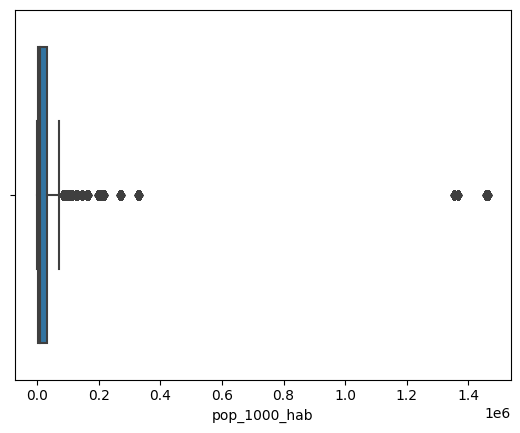

In [21]:
sns.boxplot(data=df, x='pop_1000_hab')

Text(0.5, 1.0, 'pop_1000_hab')

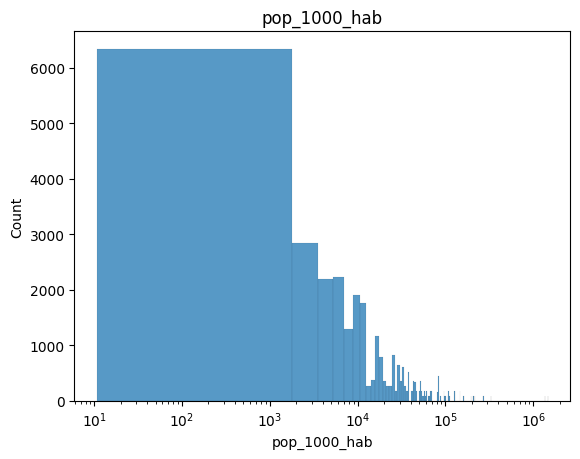

In [22]:
sns.histplot(data=df, x='pop_1000_hab')
plt.xscale('log')
plt.title('pop_1000_hab')

# 3 Quelle est la population de l’Ukraine en 2018 ? 

In [23]:
a=df.loc[(df['pays'] == 'Ukraine') & (df['année'] == 2018), ["pop_1000_hab"]].values[0]
a[0]*1000

a=a.astype(float)
a

array([44246.])

# la population de l'ukraine en 2018 est de 44246*1000=44 246 000habitants

# 4 Quels sont les 10 pays les plus peuplés ?


In [24]:
df_grouped = df.groupby('pays').sum()
df_trie = df_grouped.sort_values('pop_1000_hab', ascending=False)
top_10 = df_trie.head(10)
top_10.index


/tmp/ipykernel_5140/2833794290.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('pays').sum()


Index(['Chine', 'Inde', 'États-Unis d'Amérique', 'Indonésie', 'Pakistan',
       'Brésil', 'Nigéria', 'Bangladesh', 'Fédération de Russie', 'Mexique'],
      dtype='object', name='pays')

# les 10 pays les plus peuplés sont : 'Chine', 'Inde', 'États-Unis d'Amérique', 'Indonésie', 'Pakistan',
   #    'Brésil', 'Nigéria', 'Bangladesh', 'Fédération de Russie', 'Mexique'

In [25]:
df.pop(df.année==2019).sort_values('pop_1000_hab',acsending=False).sum()

InvalidIndexError: 0        False
1        False
2        False
3        False
4        False
         ...  
31973     True
31974     True
31975     True
31976     True
31977     True
Name: année, Length: 31978, dtype: bool

In [ ]:
al=df_2018.groupby(by='pays')["pop_1000_hab"].sum()
al.iloc[0:].sum()

688402239.15

In [ ]:
tot_pays=df_2018.groupby(by='pays')["pop_1000_hab"].head(10)
# df_2018["pop_1000_hab"].nlargest(n=10)
tot_pays

0        37172.0
1        37172.0
2        37172.0
3        37172.0
4        37172.0
          ...   
31801    17352.0
31802    17352.0
31803    17352.0
31804    17352.0
31805    17352.0
Name: pop_1000_hab, Length: 1790, dtype: float64

# 5 Quelle est la population mondiale en 2018 ? En 2019 ? Est-ce que ce chiffre correspond à la réalité ? 

In [ ]:
masque = df['année'] == 2018
df_2018 = df[masque]

In [ ]:
masque = df['année'] == 2019
df_2019 = df[masque]

In [ ]:

popu_2018= df.loc[df["année"]==2018].drop_duplicates(subset=["pays"])
popu_2019= df.loc[df["année"]==2019].drop_duplicates(subset=["pays"])
popu_2018['pop_1000_hab'].sum()*1000


7604658240.0

In [ ]:
popu_2019['pop_1000_hab'].sum()*1000

7700662470.000001

# oui une population mondiale de 7 604 658 240 en 2018 et 7 700 662 470 en 2019 correspondent à la réalité des chiffres 

In [ ]:
dato=df.drop_duplicates(subset=["pays"]) 
datox=df.loc[dato['année'==2018]]
dato.columns

KeyError: False

In [ ]:
al=df_2018.groupby(by='pays')["pop_1000_hab"].sum()
al.iloc[0:].sum()

AttributeError: 'SeriesGroupBy' object has no attribute 'iloc'

In [ ]:
al=df_2019.groupby(by='pays')["pop_1000_hab"].sum()
al.iloc[0:].sum()

698610060.87

# 6 Pour quels pays dispose-t-on du moins d’informations (nombre de valeurs manquantes) ? Donnez-en 5.


In [ ]:
dato=df.drop_duplicates(subset=["pays"]) 
list=[(0,0),(0,0),(0,0),(0,0),(0,0)]
a=dato['pays'].values               #on a la liste de tous les pays
for i in a :
    daty=df.loc[df['pays']==i,:]  #ds chaque pays on itére sur 
    yta=daty.isna().sum()
    o=yta.values.sum()              # i= le pays   // o la valeur de son total de nan
    print(o)                            
    count=0
    print(type(yta))
    list.append((i,o))
    #for j in yta.values:                 #on compte l'ensemble des nan de chaque pays (en ajoutant les nan de chaque colonne du pays x)
    #     count+=j                     #count va reprendre le total de nan pr chaque pays
    #     # if count>list[4][1]:
    #     list.append(i,j)
    
list
tri_liste = sorted(list, key=lambda x: x[1], reverse=True)[:5]
print(tri_liste)
        
    

36
<class 'pandas.core.series.Series'>
40
<class 'pandas.core.series.Series'>
16
<class 'pandas.core.series.Series'>
27
<class 'pandas.core.series.Series'>
28
<class 'pandas.core.series.Series'>
16
<class 'pandas.core.series.Series'>
22
<class 'pandas.core.series.Series'>
16
<class 'pandas.core.series.Series'>
22
<class 'pandas.core.series.Series'>
16
<class 'pandas.core.series.Series'>
8
<class 'pandas.core.series.Series'>
19
<class 'pandas.core.series.Series'>
28
<class 'pandas.core.series.Series'>
16
<class 'pandas.core.series.Series'>
16
<class 'pandas.core.series.Series'>
14
<class 'pandas.core.series.Series'>
18
<class 'pandas.core.series.Series'>
34
<class 'pandas.core.series.Series'>
22
<class 'pandas.core.series.Series'>
16
<class 'pandas.core.series.Series'>
31
<class 'pandas.core.series.Series'>
16
<class 'pandas.core.series.Series'>
37
<class 'pandas.core.series.Series'>
31
<class 'pandas.core.series.Series'>
16
<class 'pandas.core.series.Series'>
34
<class 'pandas.core.ser


#les 5 pays avce le moins d'informations sont la République populaire démocratique de Corée, le Tchad, l'Albanie, le Chili, la Tchéquie

# 7 Créez une nouvelle colonne taux_croissance_pop_18_19 avec le taux de variation de la population entre 2018 et 2019 dans chaque pays. Affichez les 5 pays avec le taux de croissance démographique le plus élevé.

In [ ]:
df["taux_croiss_pop_1819"]=0
dato=df.drop_duplicates(subset=["pays"])
pop_2018= df.loc[df["année"]==2018].drop_duplicates(subset=["pays"])
pop_2019= df.loc[df["année"]==2019].drop_duplicates(subset=["pays"])
a=dato['pays'].values   

for i in a :
    if i=='Bahreïn':
        pass
    elif i=='Bhoutan':
        pass
    elif i=='Nauru':
        pass
    
    elif i=='Micronésie (États fédérés de)':
        pass
    elif i=='Qatar':
        pass
    elif i=='Soudan du Sud':
        pass
    else:
        print (i)
        x=pop_2018.loc[pop_2018["pays"]==i]['pop_1000_hab'].iloc[0]
        print(type(x))
        print(x)
        
        v=pop_2019.loc[pop_2019["pays"]==i]['pop_1000_hab'].iloc[0]
        print(type(v))
        print(v)
        valeur=v/(x/100)-100     
        val=round(valeur,2)
        for idx, x in df['pays'].iteritems(): 
            if x==i:                                
                df["taux_croiss_pop_1819"][idx]=val
            #2018(puis refaire 2019)  
    #j=data.loc[data["pays"]==i & data['année']==2018]['pop_1000_hab']    #reprendre l'index de i et y placer cette valeur!!
     #parcours de tous les pays, s'il correspond au pays que je veux > j'attribue à ses index, ds la colonne croissance, le taux trouvé
df["taux_croiss_pop_1819"]
    


Afghanistan
<class 'numpy.float64'>
37172.0
<class 'numpy.float64'>
38041.75
Albanie
<class 'numpy.float64'>
2883.0
<class 'numpy.float64'>
2880.92
Algérie
<class 'numpy.float64'>
42228.0
<class 'numpy.float64'>
43053.05
Angola
<class 'numpy.float64'>
30810.0
<class 'numpy.float64'>
31825.29
Antigua-et-Barbuda
<class 'numpy.float64'>
96.0
<class 'numpy.float64'>
97.12
Azerbaïdjan
<class 'numpy.float64'>
9949.54
<class 'numpy.float64'>
10047.72
Argentine
<class 'numpy.float64'>
44361.0
<class 'numpy.float64'>
44780.68
Australie
<class 'numpy.float64'>
24898.0
<class 'numpy.float64'>
25203.2
Autriche
<class 'numpy.float64'>
8891.0
<class 'numpy.float64'>
8955.1
Bahamas
<class 'numpy.float64'>
386.0
<class 'numpy.float64'>
389.48
Bangladesh
<class 'numpy.float64'>
161377.0
<class 'numpy.float64'>
163046.16
Arménie
<class 'numpy.float64'>
2951.74
<class 'numpy.float64'>
2957.73
Barbade
<class 'numpy.float64'>
287.0
<class 'numpy.float64'>
287.02
Belgique
<class 'numpy.float64'>
11482.0
<cl

/tmp/ipykernel_9068/3299150682.py:31: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, x in df['pays'].iteritems():
/tmp/ipykernel_9068/3299150682.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["taux_croiss_pop_1819"][idx]=val


Botswana
<class 'numpy.float64'>
2254.0
<class 'numpy.float64'>
2303.7
Brésil
<class 'numpy.float64'>
209469.0
<class 'numpy.float64'>
211049.53
Belize
<class 'numpy.float64'>
383.0
<class 'numpy.float64'>
390.35
Îles Salomon
<class 'numpy.float64'>
653.0
<class 'numpy.float64'>
669.82
Bulgarie
<class 'numpy.float64'>
7052.0
<class 'numpy.float64'>
7000.12
Myanmar
<class 'numpy.float64'>
53708.0
<class 'numpy.float64'>
54045.42
Burundi
<class 'numpy.float64'>
11175.37
<class 'numpy.float64'>
11530.58
Bélarus
<class 'numpy.float64'>
9453.0
<class 'numpy.float64'>
9452.41
Cambodge
<class 'numpy.float64'>
16250.0
<class 'numpy.float64'>
16486.54
Cameroun
<class 'numpy.float64'>
25216.0
<class 'numpy.float64'>
25876.38
Canada
<class 'numpy.float64'>
37075.0
<class 'numpy.float64'>
37411.05
Cabo Verde
<class 'numpy.float64'>
544.0
<class 'numpy.float64'>
549.93
République centrafricaine
<class 'numpy.float64'>
4666.0
<class 'numpy.float64'>
4745.19
Sri Lanka
<class 'numpy.float64'>
21229.0


0        2.34
1        2.34
2        2.34
3        2.34
4        2.34
         ... 
31973    2.93
31974    2.93
31975    2.93
31976    2.93
31977    2.93
Name: taux_croiss_pop_1819, Length: 31978, dtype: float64

# 8 Quel est le taux de croissance moyen en fonction de la zone géographique ?


In [ ]:
dal= df.groupby(by="zone")["taux_croiss_pop_1819"].mean()
dal

zone
1                       0.996243
australia_new_zeland    1.033911
caribbean               0.643996
central_america         1.373591
east_africa             2.331397
eastern_asia            0.632731
eastern_europe         -0.219009
melanesia               1.738749
micronesia              1.390000
northern_africa         1.707816
northern_america        0.755866
northern_europe         0.220175
polynesia               2.231489
south_america           0.899610
south_eastern_asia      1.170100
southern_africa         1.464007
southern_asia           1.603452
southern_europe        -0.178400
western_africa          2.632227
western_asia            1.293885
western_europe          0.270242
Name: taux_croiss_pop_1819, dtype: float64

# 9 Calculez la disponibilité de nourriture totale par pays et par année, en kcal et kg de protéines. Attention aux unités de mesure !


In [ ]:
kcal=df.columns[6]
prot=df.columns[9]

# df["kcal_total_pays_an_"]= df.groupby('pays')[kcal].sum()
# df["prot_total_pays_an_"]= a

bo=df.groupby('pays')[kcal].sum()*365
bo
data2019=df.loc[df.année ==2019][['pays','pop_1000_hab']]
data2019=data2019.drop_duplicates()
data2019
crozet=pd.merge(data2019,bo, on='pays').rename(columns={kcal:"kcal_total_pays_an"})
# crozet["kcal_total_pays_an"]=crozet["kcal_total_pays_an"].apply(lambda x : x * crozet['pop_1000_hab']*1000)
crozet["kcal_total_pays_an"]=crozet["kcal_total_pays_an"]* crozet.pop_1000_hab * 1000
crozet[['pays',"kcal_total_pays_an"]]

,pays,kcal_total_pays_an
0,Afghanistan,6.257272e+13
1,Albanie,6.953102e+12
2,Algérie,1.076593e+14
3,Angola,5.641620e+13
4,Antigua-et-Barbuda,1.750246e+11
...,...,...
180,Ouzbékistan,7.805086e+13
181,Venezuela (République bolivarienne du),4.643549e+13
182,Samoa,4.417654e+11
183,Yémen,4.336481e+13


In [ ]:
prot=df.columns[9]

# df["kcal_total_pays_an_"]= df.groupby('pays')[kcal].sum()
# df["prot_total_pays_an_"]= a

proti=df.groupby('pays')[prot].sum()*365
bo
data2019=df.loc[df.année ==2019][['pays','pop_1000_hab']]
data2019=data2019.drop_duplicates()
data2019
crozeti=pd.merge(crozet,proti, on='pays').rename(columns={prot:"prot_total_pays_an"})
# crozet["kcal_total_pays_an"]=crozet["kcal_total_pays_an"].apply(lambda x : x * crozet['pop_1000_hab']*1000)
crozeti["prot_total_pays_an"]=crozeti["prot_total_pays_an"]* crozet.pop_1000_hab * 1000
crozeti[['pays',"prot_total_pays_an"]]

,pays,prot_total_pays_an
0,Afghanistan,1.578890e+12
1,Albanie,2.400867e+11
2,Algérie,2.866771e+12
3,Angola,1.176260e+12
4,Antigua-et-Barbuda,5.749795e+09
...,...,...
180,Ouzbékistan,2.445225e+12
181,Venezuela (République bolivarienne du),1.087249e+12
182,Samoa,1.270271e+10
183,Yémen,1.123698e+12


In [ ]:
prot

'Disponibilité de protéines en quantité (g/personne/jour)'

# 10 Calculez le ratio énergie/poids de chaque produit et pays.

In [27]:
df.columns

Index(['code_pays', 'pays', 'année', 'pop_1000_hab', 'type', 'produit',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)', 'zone'],
      dtype='object', name='élément')

In [29]:
a=df['produit'].value_counts()

In [31]:
kcal=df.columns[6]
kg=df.columns[7]
prot=df.columns[9]

In [32]:
datanona = df[~(df[kg] == 0)]
datanona['ratio'] = (datanona[kcal]* 365) / datanona[kg]
datanona[datanona['produit'] == 'Feve de Cacao et produits'].sort_values(by='ratio', ascending=False)
kcal_kg = datanona.groupby('produit').ratio.mean()


kcal_kg[kcal_kg.index == 'Oeufs']
kcal_kg.sort_values()
kcal_kg.sort_values(ascending=False).head(6)
df[df.produit == 'Feve de Cacao et produits'].sort_values(by=kcal, ascending=False)






/tmp/ipykernel_5140/2092818643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanona['ratio'] = (datanona[kcal]* 365) / datanona[kg]


élément,code_pays,pays,année,pop_1000_hab,type,produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),zone
17223,442,Luxembourg,2019,615.73,vegetal,Feve de Cacao et produits,110.73,0.00,10.04,1.25,western_europe
17142,442,Luxembourg,2018,604.00,vegetal,Feve de Cacao et produits,107.20,0.00,9.71,1.23,western_europe
19428,499,Monténégro,2018,628.00,vegetal,Feve de Cacao et produits,80.97,0.01,7.34,0.91,southern_europe
19517,499,Monténégro,2019,627.99,vegetal,Feve de Cacao et produits,80.39,0.02,7.28,0.92,southern_europe
16540,428,Lettonie,2019,1906.74,vegetal,Feve de Cacao et produits,73.86,0.00,6.71,0.79,northern_europe
...,...,...,...,...,...,...,...,...,...,...,...
8894,231,Éthiopie,2018,109224.00,vegetal,Feve de Cacao et produits,0.07,0.00,0.01,0.00,east_africa
4162,108,Burundi,2019,11530.58,vegetal,Feve de Cacao et produits,0.06,0.00,0.01,0.00,east_africa
4075,108,Burundi,2018,11175.37,vegetal,Feve de Cacao et produits,0.04,0.00,0.00,0.00,east_africa
10820,288,Ghana,2018,29767.00,vegetal,Feve de Cacao et produits,0.00,0.00,0.00,0.00,western_africa


In [36]:


datanona = df[~(df[kg] == 0)]
datanona['percentage_prot'] = (datanona[prot]) / (datanona[kg] * 1000 / 365 )


datanona['percentage_prot'].isna().sum()
datanona = datanona.dropna(subset=['percentage_prot'])


percent_prot = datanona.groupby('produit')['percentage_prot'].mean()
percent_prot['Oeufs']






/tmp/ipykernel_5140/2962072305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanona['percentage_prot'] = (datanona[prot]) / (datanona[kg] * 1000 / 365 )


0.1081360032485626

# 11 quels ont les 10 aliments les plus caloriques? 

In [39]:
# df.sort_values(ascending=False, by='ratio_prot')
kcal_kg.sort_values(ascending=False).head(11)


produit
Feve de Cacao et produits    226544.529529
Graisses Animales Crue        25759.307491
Huile de Colza&Moutarde       19881.432212
Huil Plantes Oleif Autr       16846.709165
Huile de Soja                 10819.375844
Huile Graines de Coton        10707.319746
Huile de Coco                  9578.373143
Huile de Son de Riz            9439.619418
Huile de Tournesol             9129.056231
Huile de Palmistes             9041.887237
Huile de Sésame                9004.197789
Name: ratio, dtype: float64

# 13 Quels sont les 10 aliments les plus riches en protéines ?

In [40]:
percent_prot.sort_values(ascending=False).head(11)

produit
Feve de Cacao et produits          2.858599
Graines Colza/Moutarde             0.239715
Pois                               0.230653
Légumineuses Autres et produits    0.219936
Haricots                           0.219095
Viande, Autre                      0.216096
Arachides                          0.203831
Plantes Oleiferes, Autre           0.182648
Soja                               0.178631
Graines de coton                   0.178215
Abats Comestible                   0.175912
Name: percentage_prot, dtype: float64

# 14 boite a moustache

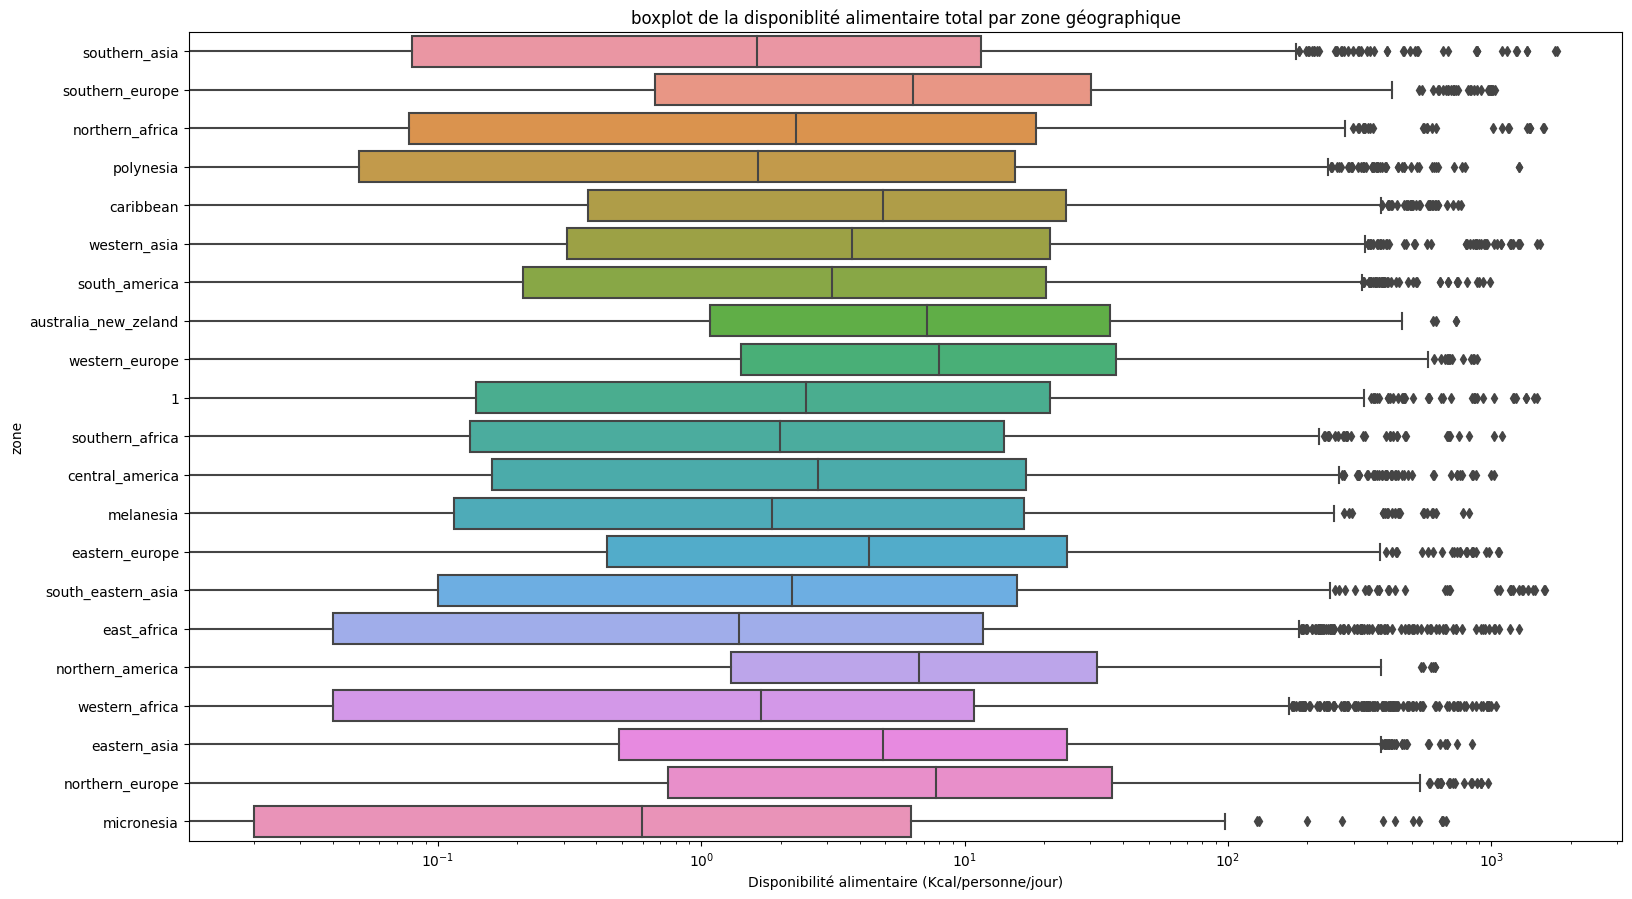

In [41]:




fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

sns.boxplot(data=df, x=df[kcal], y='zone', whis= 15, ax=ax)
plt.xscale('log')
plt.title('boxplot de la disponiblité alimentaire total par zone géographique')
plt.show()



#  Avec la disponibilité alimentaire de produits végétaux combien d’être humains pourrait-on nourrir ?


In [ ]:
df[df['type'] == 'vegetal'][kcal].sum() / (2600 * 365)
